In [1]:
### import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [46]:
df = pd.read_csv('dataset.csv')

In [3]:
### EDA
df.head()

,x,y,z
0,1.072931,-1.088346,-0.901331
1,0.940791,1.023454,-1.022105
2,1.124995,1.107333,-0.987351
3,-1.157148,-0.947454,-1.021704
4,0.996126,1.080811,1.200051


In [83]:
### Projecting the data points onto a 2 dimension space to better visualize it
# pca = PCA(n_components=2)
# principalComponents = pca.fit_transform(df)
# plt.scatter(principalComponents[:,0], principalComponents[:,1])
# plt.figure(num=1, figsize=(6, 3.5), dpi=150, facecolor='w', edgecolor='k')
# plt.show()

In [72]:
pca_single = PCA(n_components=1)
principalComponents1 = pca_single.fit_transform(df)

In [73]:
import numpy as np
import matplotlib.pyplot as plt
def find_anomalies(data):
    anomalies = []
    
    data_std = np.std(data)
    data_mean = np.mean(data)
    anomaly_cut_off = data_std*3
    
    lower_limit  = data_mean - anomaly_cut_off 
    upper_limit = data_mean + anomaly_cut_off
    
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

print('Outlier list:', find_anomalies(principalComponents1))

Outlier list: []


no outliers

In [78]:
### data normalization
x = StandardScaler().fit_transform(df)

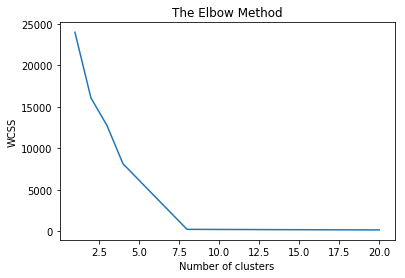

In [79]:
### Using K-means to cluster the data
### Using Elbow Method to choose the best k
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 21), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [80]:
# kmeansplus = KMeans(n_clusters=4, init = 'k-means++', random_state = 42)
# y_kmeansplus = kmeansplus.fit_predict(x)
# #plt.figure(num=1, figsize=(6, 3.5), dpi=150, facecolor='w', edgecolor='k')
# plt.scatter(principalComponents[y_kmeansplus == 0, 0], principalComponents[y_kmeansplus == 0, 1], s = 10, c = 'red', alpha=0.35)
# plt.scatter(principalComponents[y_kmeansplus == 1, 0], principalComponents[y_kmeansplus == 1, 1], s = 10, c = 'green', alpha=0.35)
# plt.scatter(principalComponents[y_kmeansplus == 2, 0], principalComponents[y_kmeansplus == 2, 1], s = 10, c = 'blue', alpha=0.35)
# plt.scatter(principalComponents[y_kmeansplus == 3, 0], principalComponents[y_kmeansplus == 3, 1], s = 10, c = 'orange', alpha=0.35)
# plt.title('K-Means ++')
# plt.xlabel('PC0')
# plt.ylabel('PC1')
# plt.show()

In [81]:
# kmeansplus = KMeans(n_clusters=4, init = 'k-means++', random_state = 42)
# y_kmeansplus = kmeansplus.fit_predict(x)
# plt.figure(num=1, figsize=(6, 3.5), dpi=150, facecolor='w', edgecolor='k')
# plt.scatter(principalComponents2[y_kmeansplus == 0, 0], principalComponents2[y_kmeansplus == 0, 1], s = 10, c = 'red', alpha=0.35)
# plt.scatter(principalComponents2[y_kmeansplus == 1, 0], principalComponents2[y_kmeansplus == 1, 1], s = 10, c = 'green', alpha=0.35)
# plt.scatter(principalComponents2[y_kmeansplus == 2, 0], principalComponents2[y_kmeansplus == 2, 1], s = 10, c = 'blue', alpha=0.35)
# plt.scatter(principalComponents2[y_kmeansplus == 3, 0], principalComponents2[y_kmeansplus == 3, 1], s = 10, c = 'orange', alpha=0.35)
# plt.title('K-Means ++')
# plt.xlabel('PC0')
# plt.ylabel('PC1')
# plt.show()

In [85]:
### Project the data onto a 2d space to better visualize the clusters
principalComponents = principalComponents = pca.fit_transform(x)

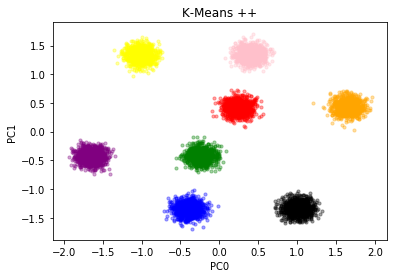

In [88]:
kmeansplus = KMeans(n_clusters=8, init = 'k-means++', random_state = 42)
y_kmeansplus = kmeansplus.fit_predict(x) + 1
#plt.figure(num=1, figsize=(6, 3.5), dpi=150, facecolor='w', edgecolor='k')
plt.scatter(principalComponents[y_kmeansplus == 1, 0], principalComponents[y_kmeansplus == 1, 1], s = 10, c = 'red', alpha=0.35)
plt.scatter(principalComponents[y_kmeansplus == 2, 0], principalComponents[y_kmeansplus == 2, 1], s = 10, c = 'green', alpha=0.35)
plt.scatter(principalComponents[y_kmeansplus == 3, 0], principalComponents[y_kmeansplus == 3, 1], s = 10, c = 'blue', alpha=0.35)
plt.scatter(principalComponents[y_kmeansplus == 4, 0], principalComponents[y_kmeansplus == 4, 1], s = 10, c = 'orange', alpha=0.35)
plt.scatter(principalComponents[y_kmeansplus == 5, 0], principalComponents[y_kmeansplus == 5, 1], s = 10, c = 'yellow', alpha=0.35)
plt.scatter(principalComponents[y_kmeansplus == 6, 0], principalComponents[y_kmeansplus == 6, 1], s = 10, c = 'black', alpha=0.35)
plt.scatter(principalComponents[y_kmeansplus == 7, 0], principalComponents[y_kmeansplus == 7, 1], s = 10, c = 'purple', alpha=0.35)
plt.scatter(principalComponents[y_kmeansplus == 8, 0], principalComponents[y_kmeansplus == 8, 1], s = 10, c = 'pink', alpha=0.35)
plt.title('K-Means ++')
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.show()

In [90]:
## performance test
## Using Calinski Harabaz Score to evaluzte the cluster performance
from sklearn import metrics
from sklearn.metrics import pairwise_distances
res, max_score = [], -float('inf')
for i in range(2, 21):
    test = KMeans(n_clusters=i, init = 'k-means++', random_state = 42)
    labels = test.fit_predict(x)
    score = metrics.calinski_harabaz_score(x, labels)
    if score > max_score:
        max_score = score
        opt_cluster = i
    res.append(score)
print('Optimal number of cluster: '+str(opt_cluster)+'\n'+'Calinski Harabaz Score: '+str(max_score))

Optimal number of cluster: 8
Calinski Harabaz Score: 113297.71760904058


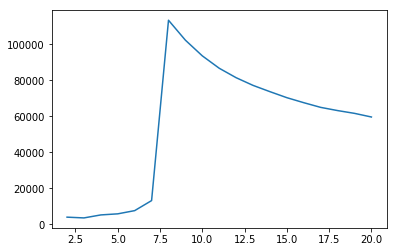

In [91]:
### Calinski Harabaz Score visualization by different number of clusters
plt.plot(range(2, 21), res)
plt.show()

In [93]:
df['cluster#'] = y_kmeansplus

In [94]:
df.head()

,x,y,z,cluster#
0,1.072931,-1.088346,-0.901331,2
1,0.940791,1.023454,-1.022105,7
2,1.124995,1.107333,-0.987351,7
3,-1.157148,-0.947454,-1.021704,6
4,0.996126,1.080811,1.200051,5
